(-0.5, 479.5, 359.5, -0.5)

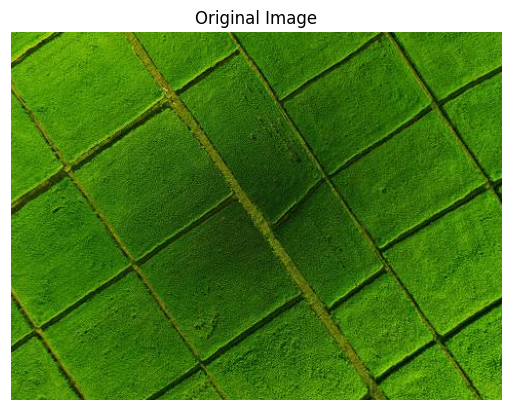

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('FARMS_2.jpeg')
# Get image dimensions
height, width, _ = image.shape

# Draw a white rectangle that covers the entire image to complete incomplete lands
cv2.rectangle(image, (0, 0), (width-1, height-1), (255, 255, 255), 1)

# grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# original Image
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')



(-0.5, 479.5, 359.5, -0.5)

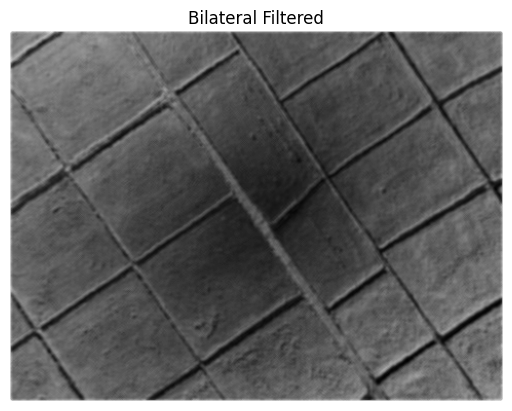

In [3]:
# bilateral filter
bilateral_filtered = cv2.bilateralFilter(gray, 5, 175, 175)
# Bilateral Filtered Image
plt.title('Bilateral Filtered')
plt.imshow(bilateral_filtered, cmap='gray')
plt.axis('off')


(-0.5, 479.5, 359.5, -0.5)

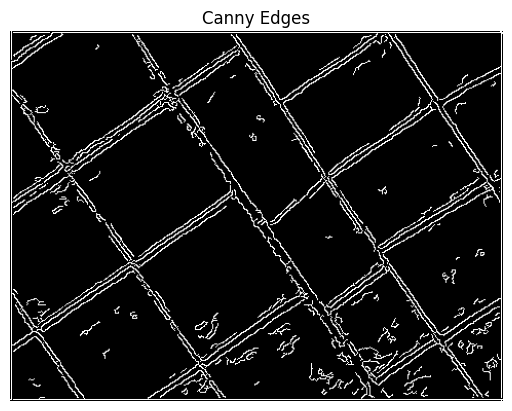

In [4]:
# Canny edge detector
edges = cv2.Canny(bilateral_filtered, 50, 100)
# Canny Edges
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')


(-0.5, 479.5, 359.5, -0.5)

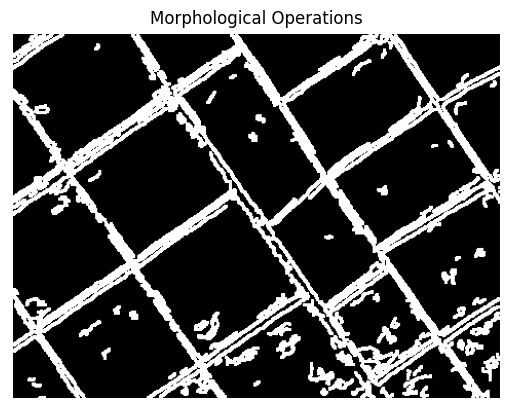

In [5]:
# morphological operation for dilation
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(edges, cv2.MORPH_DILATE, kernel)
# Morphological Operations
plt.title('Morphological Operations')
plt.imshow(morph, cmap='gray')
plt.axis('off')


(-0.5, 479.5, 359.5, -0.5)

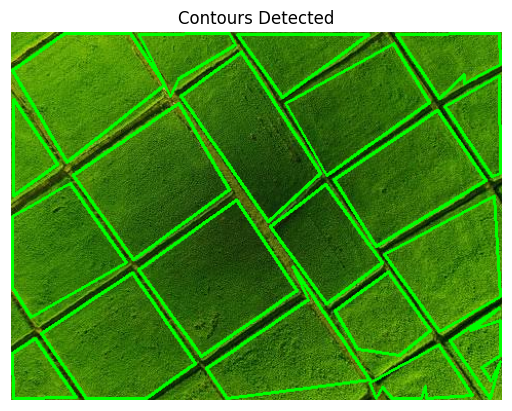

In [10]:
# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# remove small contours
min_area = 500
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Approximate contours
approx_contours = []
for cnt in filtered_contours:
    epsilon = 0.025 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    approx_contours.append(approx)

# Sort contours by area and removing picture contour(biggest one)
sorted_contours = sorted(approx_contours, key=cv2.contourArea, reverse=True)[1:]

detection = image.copy()
cv2.drawContours(detection, sorted_contours, -1, (0, 255, 0), 2)
# Contours Detected
plt.figure()
plt.title('Contours Detected')
plt.imshow(cv2.cvtColor(detection, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 479.5, 359.5, -0.5)

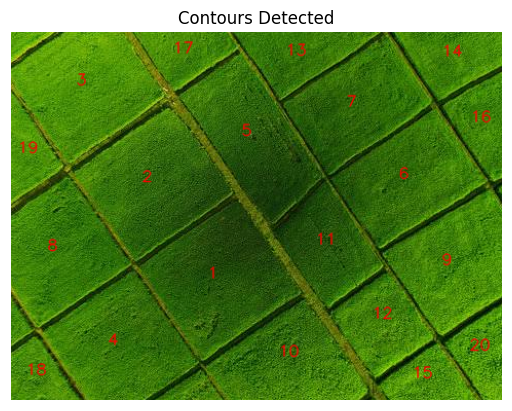

In [12]:
detection = image.copy()

# Write the rank of each contour on the image
for i, cnt in enumerate(sorted_contours):
    rank = i + 1
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])-10
        if width - cx < 10: cx = width-10
        cy = int(M['m01'] / M['m00'])
        if cy < 15: cy = 15
        cv2.putText(detection, str(rank), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

    # Contours Detected
plt.figure()
plt.title('Contours Detected')
plt.imshow(cv2.cvtColor(detection, cv2.COLOR_BGR2RGB))
plt.axis('off')